# **Python para análise de dados(Pandas)** - *Vasco Monteiro Neto*

### O banco de dados usado nesse notebook foi retirado do Portal Brasileiro de Dados Abertos e contém informações acerca de imóveis da União que não são ocupados pela Administração Pública. São explorados os principais conceitos da aula: concatenação de DataFrames, limpeza dos dados, criação de novas colunas e ordenação.

#### Link: https://dados.gov.br/dataset/imoveis-da-uniao

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('da-imoveisdauniao-out-2020.xlsx')

C:\Users\danyn\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
df.head()

,Classe,Número do RIP,Id. Utilização,Data de cadastramento,UF,Município,Endereço,Bairro,Conceituação,Tipo Imóvel,Regime de Utilização,Proprietário Oficial,Data do Início da Utilização,Área do Terreno Total,Área da União
0,DOMINIAL,1010000141,2.0,09-03-1999,RO,GUAJARA-MIRIM,AV BEIRA RIO 500 MARGEM DO RIO MAMORE CEP: 768...,CENTRO,MARGINAL DE RIO,TERRENO,OCUPACAO,União (Adm. Pub. Fed. direta),12-02-2001,"2.131,20","2.131,20"
1,DOMINIAL,1010000222,1.0,16-03-1999,RO,GUAJARA-MIRIM,AV BEIRA RIO 1398 QUADRAS 159B E 160B CEP: 768...,TRIANGULO,MARGINAL DE RIO,TERRENO,OCUPACAO,União (Adm. Pub. Fed. direta),01-05-1998,"6.175,00","6.175,00"
2,DOMINIAL,1010000303,1.0,16-03-1999,RO,GUAJARA-MIRIM,AV BEIRA RIO 1001 QUADRA 115B - MARGEM DO RIO ...,TRIANGULO,MARGINAL DE RIO,TERRENO,OCUPACAO,União (Adm. Pub. Fed. direta),01-05-1998,"1.925,00","1.925,00"
3,DOMINIAL,1010000494,1.0,16-03-1999,RO,GUAJARA-MIRIM,AV ESTEVAO CORREA 13 MARGEM DO RIO MAMORE CEP:...,TRIANGULO,MARGINAL DE RIO,TERRENO,OCUPACAO,União (Adm. Pub. Fed. direta),01-05-1998,"1.800,00","1.800,00"
4,DOMINIAL,1010000737,1.0,21-08-2000,RO,GUAJARA-MIRIM,AV BEIRA RIO 45 QUADRA 46B SETOR 01 CEP: 76850000,CENTRO,MARGINAL DE RIO C/NAC INTERIOR,TERRENO,OCUPACAO,União (Adm. Pub. Fed. direta),01-01-1997,"660,00","660,00"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724478 entries, 0 to 724477
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Classe                        724478 non-null  object 
 1   Número do RIP                 724478 non-null  int64  
 2   Id. Utilização                707793 non-null  float64
 3   Data de cadastramento         724478 non-null  object 
 4   UF                            724478 non-null  object 
 5   Município                     724478 non-null  object 
 6   Endereço                      724322 non-null  object 
 7   Bairro                        715447 non-null  object 
 8   Conceituação                  722221 non-null  object 
 9   Tipo Imóvel                   724478 non-null  object 
 10  Regime de Utilização          724478 non-null  object 
 11  Proprietário Oficial          724478 non-null  object 
 12  Data do Início da Utilização  593830 non-nul

### Extraindo do dataset apenas algumas variáveis e depois um subset comm dados de 4 estados diferentes.

In [5]:
df = df[['UF','Município','Data do Início da Utilização','Área do Terreno Total']]
df.head(5)

,UF,Município,Data do Início da Utilização,Área do Terreno Total
0,RO,GUAJARA-MIRIM,12-02-2001,"2.131,20"
1,RO,GUAJARA-MIRIM,01-05-1998,"6.175,00"
2,RO,GUAJARA-MIRIM,01-05-1998,"1.925,00"
3,RO,GUAJARA-MIRIM,01-05-1998,"1.800,00"
4,RO,GUAJARA-MIRIM,01-01-1997,"660,00"


In [6]:
dfRS = df.loc[df['UF'] == 'RS']
dfBA = df.loc[df['UF'] == 'BA']
dfGO = df.loc[df['UF'] == 'GO']
dfMT = df.loc[df['UF'] == 'MT']

### Realizando a concatenação dos DataFrames

In [7]:
df = pd.concat([dfRS, dfBA, dfGO, dfMT])

In [8]:
df['UF'].unique()

array(['RS', 'BA', 'GO', 'MT'], dtype=object)

In [9]:
df.sample(5)

,UF,Município,Data do Início da Utilização,Área do Terreno Total
723967,GO,GOUVELANDIA,10-12-2018,"21.600,00"
655577,RS,TRAMANDAI,NaN,"300,00"
316819,BA,SAO FELIX,NaN,"150,00"
311476,BA,SALVADOR,01-01-1950,"345,45"
312480,BA,SALVADOR,28-11-2011,"93,12"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57053 entries, 423677 to 724365
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   UF                            57053 non-null  object
 1   Município                     57053 non-null  object
 2   Data do Início da Utilização  43076 non-null  object
 3   Área do Terreno Total         57053 non-null  object
dtypes: object(4)
memory usage: 2.2+ MB


### Alterando o tipo de dado da coluna 'Data de cadastramento'

In [11]:
df["Data do Início da Utilização"] = pd.to_datetime(df['Data do Início da Utilização'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57053 entries, 423677 to 724365
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   UF                            57053 non-null  object        
 1   Município                     57053 non-null  object        
 2   Data do Início da Utilização  43076 non-null  datetime64[ns]
 3   Área do Terreno Total         57053 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.2+ MB


### Tratando valores nulos

In [13]:
df.isnull().sum()

UF                                  0
Município                           0
Data do Início da Utilização    13977
Área do Terreno Total               0
dtype: int64

In [14]:
#Retirando as linhas com valores da variável 'Data do Início da Utilização' nulo.
df.dropna(subset=["Data do Início da Utilização"], inplace=True)

### Percebe-se que o número de amostras diminuiu, pois as linhas com valores nulos foram retiradas do DataFrame

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43076 entries, 423677 to 724361
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   UF                            43076 non-null  object        
 1   Município                     43076 non-null  object        
 2   Data do Início da Utilização  43076 non-null  datetime64[ns]
 3   Área do Terreno Total         43076 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.6+ MB


### Criando novas colunas

#### Criação de colunas separadas referente ao ano, mês e dia de utilização

In [16]:
df['Dia'] = df['Data do Início da Utilização'].dt.day
df['Mes'] = df['Data do Início da Utilização'].dt.month
df['Ano'] = df['Data do Início da Utilização'].dt.year
df.drop(columns='Data do Início da Utilização', inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43076 entries, 423677 to 724361
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   UF                     43076 non-null  object
 1   Município              43076 non-null  object
 2   Área do Terreno Total  43076 non-null  object
 3   Dia                    43076 non-null  int64 
 4   Mes                    43076 non-null  int64 
 5   Ano                    43076 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.3+ MB


In [18]:
# Realizando uma limpeza na coluna da área e mudando o tipo das variáveis  de objeto para float

dfReplace = pd.DataFrame()
dfReplace = df['Área do Terreno Total'].str.replace(' ','')
dfReplace = dfReplace.str.replace('.','')
dfReplace = dfReplace.str.replace(',','.')

<ipython-input-18-5deae1322ba4>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  dfReplace = dfReplace.str.replace('.','')


In [19]:
df['Area'] = pd.to_numeric(dfReplace, errors='coerce', downcast='float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43076 entries, 423677 to 724361
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UF                     43076 non-null  object 
 1   Município              43076 non-null  object 
 2   Área do Terreno Total  43076 non-null  object 
 3   Dia                    43076 non-null  int64  
 4   Mes                    43076 non-null  int64  
 5   Ano                    43076 non-null  int64  
 6   Area                   43037 non-null  float32
dtypes: float32(1), int64(3), object(3)
memory usage: 2.5+ MB


In [20]:
df.isnull().sum()

UF                        0
Município                 0
Área do Terreno Total     0
Dia                       0
Mes                       0
Ano                       0
Area                     39
dtype: int64

In [21]:
#Retirando as linhas com valores da variável 'Area' nulo.
df.drop(columns='Área do Terreno Total', inplace=True)
df.dropna(subset=["Area"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43037 entries, 423677 to 724361
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UF         43037 non-null  object 
 1   Município  43037 non-null  object 
 2   Dia        43037 non-null  int64  
 3   Mes        43037 non-null  int64  
 4   Ano        43037 non-null  int64  
 5   Area       43037 non-null  float32
dtypes: float32(1), int64(3), object(2)
memory usage: 2.1+ MB


In [22]:
df.isnull().sum()

UF           0
Município    0
Dia          0
Mes          0
Ano          0
Area         0
dtype: int64

In [23]:
#Agrupamento por de área total por estado
df.groupby(df["UF"])["Area"].sum()

UF
BA    6.572948e+09
GO    2.819614e+09
MT    6.320319e+10
RS    2.951686e+09
Name: Area, dtype: float32

In [24]:
#Retornando a maior área
df["Area"].max()

995067264.0

In [25]:
#Retornando a menor área
df["Area"].min()

0.009999999776482582

In [26]:
#Retornando as 5 maiores áreas
df.nlargest(5, "Area")

,UF,Município,Dia,Mes,Ano,Area
661633,MT,SANTA TEREZINHA,1,1,1997,995067264.0
714363,MT,PARANATINGA,1,1,2000,985000000.0
666007,MT,COCALINHO,8,3,2016,907880896.0
687043,BA,PRADO,9,1,2010,895000000.0
714641,MT,ARIPUANA,1,1,2000,864099968.0


In [27]:
#Retornando as 5 menores áreas
df.nsmallest(5, "Area")

,UF,Município,Dia,Mes,Ano,Area
711333,RS,ALEGRETE,23,4,2018,0.01
711515,RS,CAMAQUA,14,12,2016,0.01
712011,RS,FREDERICO WESTPHALEN,21,5,2013,0.01
712259,RS,ITAQUI,27,11,2017,0.01
712394,RS,MONTENEGRO,14,12,2016,0.01


In [28]:
#Ordenando o conjunto de dados de acordo com a área
df.sort_values("Area", ascending=False).head(10)

,UF,Município,Dia,Mes,Ano,Area
661633,MT,SANTA TEREZINHA,1,1,1997,995067264.0
714363,MT,PARANATINGA,1,1,2000,985000000.0
666007,MT,COCALINHO,8,3,2016,907880896.0
687043,BA,PRADO,9,1,2010,895000000.0
714641,MT,ARIPUANA,1,1,2000,864099968.0
77291,MT,SANTA RITA DO TRIVELATO,18,3,2016,859554688.0
686099,BA,CANAVIEIRAS,26,11,2010,840320000.0
724295,MT,PORTO ALEGRE DO NORTE,27,12,1999,826737280.0
715686,MT,GENERAL CARNEIRO,2,11,1987,823011392.0
659090,MT,PONTES E LACERDA,12,1,2015,800179648.0


In [29]:
#Filtrando as propriedades que foram compradas depois de 2019 no estado da Bahia
propBahia = df.loc[(df["Ano"] > 2019) & (df["UF"] == 'BA')]

In [30]:
propBahia.sample(20)

,UF,Município,Dia,Mes,Ano,Area
320221,BA,VERA CRUZ,28,9,2020,801.900024
303387,BA,SALVADOR,24,1,2020,102.269997
315523,BA,SALVADOR,2,5,2020,3540.909912
686932,BA,PAU BRASIL,16,7,2020,404.799988
316978,BA,VALENCA,4,7,2020,567.840027
317803,BA,VERA CRUZ,2,11,2020,450.000000
685786,BA,BONITO,1,1,2020,530000.000000
314698,BA,SALVADOR,14,8,2020,16656.009766
295240,BA,MARAU,2,7,2020,9555.309570
687472,BA,SALVADOR,15,5,2020,5255.970215


# Visualização de dados

In [31]:
df["UF"].value_counts(ascending=False)

BA    24710
RS    11318
MT     5000
GO     2009
Name: UF, dtype: int64

In [32]:
import seaborn as sns

Text(0.5, 1.0, 'Número de propriedades por estado')

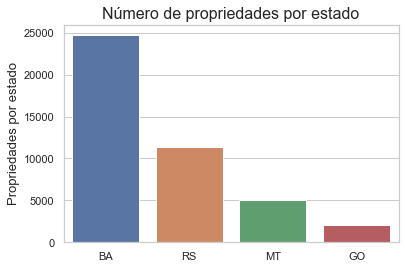

In [33]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=df["UF"].value_counts().index.tolist(), 
                 y=df["UF"].value_counts(), 
                 data=df)
ax.set_ylabel("Propriedades por estado", fontsize = 13)
ax.set_title("Número de propriedades por estado", fontsize = 16)

Text(0.5, 1.0, 'Área total das propriedades por estado')

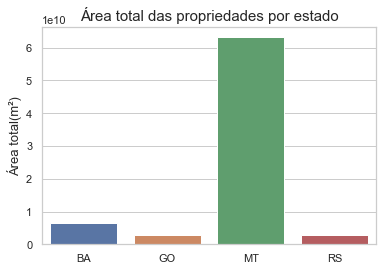

In [34]:
ax = sns.barplot(x=df.groupby(df["UF"])["Area"].sum().index.tolist(), 
                 y=df.groupby(df["UF"])["Area"].sum(), 
                 data=df)
ax.set_ylabel("Área total(m²)", fontsize = 13)
ax.set_title("Área total das propriedades por estado", fontsize = 15)

Text(0.5, 1.0, 'Tamanho médio da área das propriedades por estado')

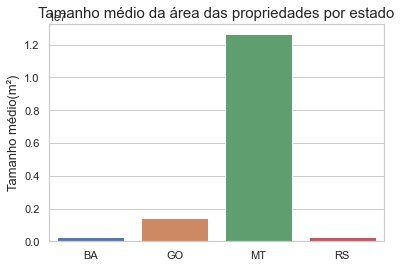

In [35]:
ax = sns.barplot(x=df.groupby(df["UF"])["Area"].mean().index.tolist(),
                 y=df.groupby(df["UF"])["Area"].mean(), 
                 data=df)
ax.set_ylabel("Tamanho médio(m²)", fontsize = 13)
ax.set_title("Tamanho médio da área das propriedades por estado", fontsize = 15)

In [36]:
import matplotlib.pyplot as plt

### Gráfico de pizza

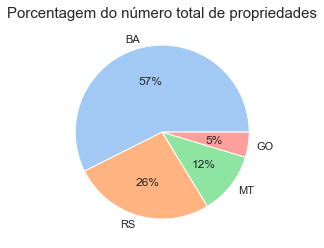

In [40]:
colors = sns.color_palette('pastel')[0:4]
plt.pie(df["UF"].value_counts(), labels = df["UF"].value_counts().index.tolist(), colors = colors, autopct='%.0f%%')
plt.title('Porcentagem do número total de propriedades', fontsize = 15)
plt.show()

Text(0.5, 0, 'Área total(m²)')

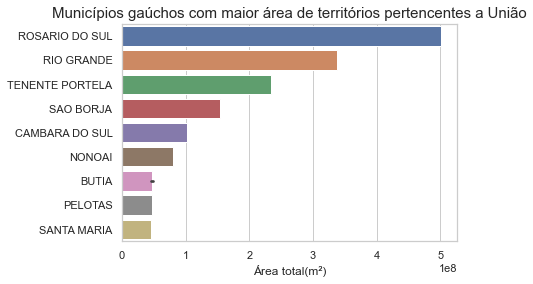

In [68]:
ax = sns.barplot(x = df.loc[(df["UF"] == 'RS')].nlargest(10, "Area")['Area'].values.tolist(), 
                 y=df.loc[(df["UF"] == 'RS')].nlargest(10, "Area")['Município'].values.tolist(), 
                 data=df)
plt.title('Municípios gaúchos com maior área de territórios pertencentes a União', fontsize = 15)
ax.set_xlabel('Área total(m²)')

<AxesSubplot:>

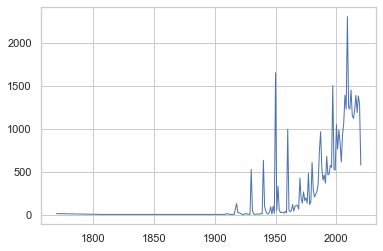

In [100]:
ano=df.groupby(df["Ano"]).count().index.tolist()
sns.lineplot(x=df.groupby("Ano")['UF'].count().index.tolist(), 
             y=df.groupby("Ano")['UF'].count().values.tolist(),
             linewidth=1)



In [95]:
df.groupby("Ano")['UF'].count().values.tolist()

[10,
 1,
 1,
 1,
 1,
 2,
 1,
 12,
 2,
 1,
 1,
 2,
 128,
 22,
 21,
 6,
 1,
 1,
 13,
 2,
 4,
 1,
 524,
 47,
 6,
 1,
 4,
 7,
 3,
 6,
 11,
 8,
 631,
 93,
 37,
 11,
 6,
 27,
 90,
 4,
 96,
 14,
 1650,
 47,
 330,
 56,
 21,
 28,
 24,
 16,
 38,
 18,
 992,
 48,
 31,
 48,
 117,
 39,
 95,
 107,
 106,
 63,
 422,
 188,
 132,
 263,
 162,
 194,
 133,
 478,
 116,
 146,
 606,
 283,
 203,
 236,
 270,
 355,
 738,
 963,
 538,
 400,
 461,
 366,
 678,
 461,
 474,
 574,
 548,
 1501,
 524,
 517,
 1047,
 760,
 983,
 840,
 611,
 923,
 1064,
 1390,
 1226,
 2302,
 1249,
 1226,
 1449,
 1153,
 1119,
 1220,
 1388,
 1187,
 1380,
 1281,
 575]